In [34]:
# Importing libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline

### Getting the Car Price Dataset

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-04 04:25:41--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2023-10-04 04:25:41 (126 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [3]:
# Importing Datset
PATH = "./data.csv"
data = pd.read_csv(PATH)

In [4]:
data.shape

(11914, 16)

In [5]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 
           'Transmission Type','Vehicle Style',
            'highway MPG', 'city mpg', 'MSRP']

In [8]:
df = data[columns]

In [9]:
df.shape

(11914, 10)

In [10]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### Data Preparation

In [11]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [12]:
df = df.fillna(0)

In [13]:
df = df.rename(columns={'msrp': 'price'})

### Question 1: What is the most frequent observation (mode) for the column transmission_type?

In [15]:
transmission_type_mode = df['transmission_type'].mode()
transmission_type_mode


0    AUTOMATIC
Name: transmission_type, dtype: object

In [20]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [23]:
# Inspecting Dataset:
df_numeric = df.copy()
df_numeric = df_numeric.drop(["make", "model", "transmission_type", "vehicle_style"], axis=1)
df_numeric.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,26.637485,19.733255,4.059474e+04
std,7.579740,110.507669,1.800554,8.863001,8.987798,6.010910e+04
min,1990.000000,0.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


### Question 2: Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

#### What are the two features that have the biggest correlation in this dataset?

In [24]:
# Inspecting Correlation
df_numeric.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


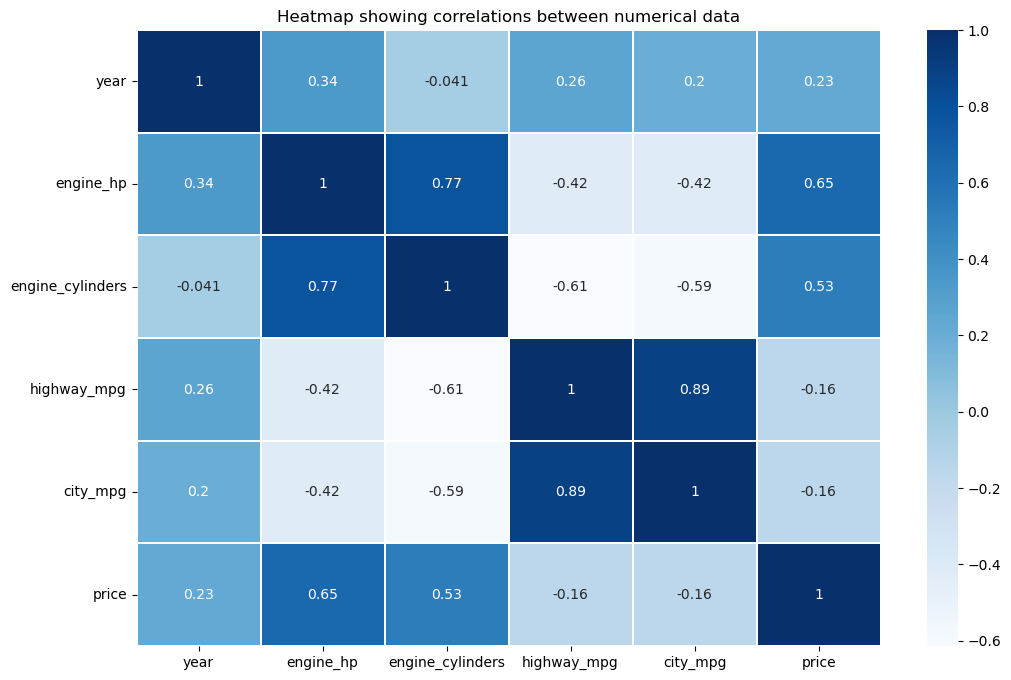

In [29]:
# Inspecting Heatmap
plt.figure(figsize=(12,8))  
sns.heatmap(df_numeric.corr(),annot=True,linewidths=.1, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

`highway_mpg` and `city_mpg` has the highest correlation of 0.89 

In [31]:
# Processing Dataset
mean = df['price'].mean()
df['above_average'] = np.where(df['price'] > mean, 1, 0)

In [33]:
df = df.drop('price',axis=1)

In [35]:
# Splitting the dataset
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [36]:
# Reseting the Indexes
df_train_full = df_train_full.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
# Preparing y Values
y_train_full = df_train_full.above_average.values
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [40]:
# Removing the target variable from the dataframe:
df_train_full = df_train_full.drop('above_average', axis=1)
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

### Question 3
Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).

In [65]:
def calculate_mi(series):
    return round(mutual_info_score(series, y_train),2)

In [66]:
categorical_variables = ['make','model','transmission_type','vehicle_style']

In [67]:
mi_scores = []
for cat in categorical_variables:
    mi_scores.append(calculate_mi(df_train[cat]))

In [68]:
mi_score = pd.DataFrame()
mi_score[''] = categorical_variables 
mi_score['MI'] = mi_scores

In [69]:
mi_score.sort_values(by='MI',ascending=False)

,,MI
1,model,0.46
0,make,0.24
3,vehicle_style,0.08
2,transmission_type,0.02


`transmission_type` has the lowest mutual information

### Question 4
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
        - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [70]:
df_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [71]:
# Transforming the Dataset
train_dict = df_train.to_dict(orient='records')

# Vectorizing the Dataset
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [87]:
# TRAINING LOGISTIC REGRESSSION MODEL:
model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# INITIALIZING THE MODEL PREDICTION:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

# INSPECTING THE ACCURACY:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.95


Accuracy ~= 0.95 

### Feature Elimination

In [93]:
features = list(df_train.columns)

In [97]:
# INSPECTING THE DIFFERENCE IN ACCURACY:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, round((orig_score - score),4), round(score,3))

make 0.0033 0.947
model 0.0306 0.919
year 0.0029 0.947
engine_hp 0.0272 0.923
engine_cylinders 0.0046 0.945
transmission_type 0.0096 0.94
vehicle_style 0.018 0.932
highway_mpg 0.0033 0.947
city_mpg 0.0041 0.946


`year` has the smallest difference

### Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.

In [119]:
columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 
           'Transmission Type','Vehicle Style',
            'highway MPG', 'city mpg', 'MSRP']

In [120]:
lin_df = data[columns]

In [121]:
lin_df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [122]:
lin_df.columns = lin_df.columns.str.replace(' ', '_').str.lower()
lin_df = lin_df.fillna(0)
lin_df = lin_df.rename(columns={'msrp':'price'}) 
lin_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [123]:
# Normalizing the data
lin_df['price'] = np.log1p(lin_df['price']) 

In [124]:
#@ SPLITTING THE DATASET:
df_train_full, df_test = train_test_split(lin_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [125]:
# Resetting the Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
     

# Preparing y Values
y_train = df_train['price'].values
y_val = df_val['price'].values
y_test = df_test['price'].values
     

# DELETING price variable:
del df_train['price']
del df_val['price']
del df_test['price']

### RIDGE REGRESSION

In [126]:
# PREPARING THE DATASET:
train_dict = df_train.to_dict(orient='records')
     
# VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [127]:
# RIDGE REGRESSION IMPLEMENTATION:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))

/home/hrithik4093/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.4868


/home/hrithik4093/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.4868


/home/hrithik4093/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.4868


/home/hrithik4093/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.4868
10 0.487


/home/hrithik4093/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
